In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import pyodbc

In [2]:
!pip install pyMechkar

In [3]:
!pip install sklearn

In [2]:
from pyMechkar import exploreData

In [4]:
### In windows, Using a ODBC DNS (predefined connection name)
conn = pyodbc.connect('DSN=hair_salon_no_shown_ff;Trusted_Connection=yes;')

In [5]:
noshow = pd.read_sql("SELECT * FROM hair_salon_no_shown_ff;",conn) 
noshow.head()

book_tod   book_dow book_category book_staff last_category last_staff  \
0  afternoon  Wednesday         STYLE         JJ       unknown    unknown   
1    morning  Wednesday         COLOR     JOANNE       unknown    unknown   
2    unknown  Wednesday         STYLE         JJ         COLOR     JOANNE   
3  afternoon   Thursday         STYLE      KELLY       unknown    unknown   
4    evening   Saturday         STYLE      KELLY         STYLE      KELLY   

  last_day_services last_receipt_tot   last_dow   last_tod  ...  \
0                 0                0    unknown    unknown  ...   
1                 0                0    unknown    unknown  ...   
2                 2              262  Wednesday    morning  ...   
3                 0                0    unknown    unknown  ...   
4                 1               35   Thursday  afternoon  ...   

  last_prod_flag last_cumrev last_cumbook last_cumstyle last_cumcolor  \
0              0           0            0             0             0   
1              0           0            0             0             0   
2              1         262            2             1             1   
3              0           0            0             0             0   
4              0          35            1             1             0   

  last_cumprod last_cumcancel last_cumnoshow recency noshow  
0            0              0              0       0      0  
1            0              0              0       0      0  
2            2              0              0      35      0  
3            0              0              0       0      0  
4            0              0              0       9      0  

[5 rows x 21 columns]

In [6]:
categoryVariableList = ["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"]
for var in categoryVariableList:
    noshow[var] = noshow[var].astype("category")

In [7]:
numericVariableList = ["last_day_services","last_receipt_tot","last_noshow","last_prod_flag","last_cumrev","last_cumbook","last_cumstyle","last_cumcolor","last_cumprod","last_cumcancel","last_cumnoshow","recency","noshow"]
for var in numericVariableList:
    noshow[var] = noshow[var].astype("float")

In [8]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 21 columns):
book_tod             1952 non-null category
book_dow             1952 non-null category
book_category        1952 non-null category
book_staff           1952 non-null category
last_category        1952 non-null category
last_staff           1952 non-null category
last_day_services    1952 non-null float64
last_receipt_tot     1952 non-null float64
last_dow             1952 non-null category
last_tod             1952 non-null category
last_noshow          1952 non-null float64
last_prod_flag       1952 non-null float64
last_cumrev          1952 non-null float64
last_cumbook         1952 non-null float64
last_cumstyle        1952 non-null float64
last_cumcolor        1952 non-null float64
last_cumprod         1952 non-null float64
last_cumcancel       1952 non-null float64
last_cumnoshow       1952 non-null float64
recency              1952 non-null float64
noshow               1952

In [64]:
noshow.describe() # describe data

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
count        1952.000000       1952.000000  1952.000000     1952.000000   
mean            0.545082         35.782679     0.076332        0.114242   
std             0.658514         59.371877     0.265597        0.318186   
min             0.000000          0.000000     0.000000        0.000000   
25%             0.000000          0.000000     0.000000        0.000000   
50%             0.000000          0.000000     0.000000        0.000000   
75%             1.000000         60.000000     0.000000        0.000000   
max             3.000000        382.800000     1.000000        1.000000   

       last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
count  1952.000000   1952.000000    1952.000000    1952.000000   1952.000000   
mean    111.258197      1.906762       1.520492       0.325307      0.487193   
std     207.927702      3.315854       2.756585       0.827646      1.261275   
min       0.000000      0.000000       0.000000       0.000000      0.000000   
25%       0.000000      0.000000       0.000000       0.000000      0.000000   
50%       0.000000      1.000000       0.000000       0.000000      0.000000   
75%     132.000000      2.000000       2.000000       0.000000      0.000000   
max    1276.000000     20.000000      18.000000       7.000000     11.000000   

       last_cumcancel  last_cumnoshow      recency       noshow  
count     1952.000000     1952.000000  1952.000000  1952.000000  
mean         0.280225        0.422643    14.402152     0.114754  
std          0.853646        1.319786    21.079495     0.318807  
min          0.000000        0.000000     0.000000     0.000000  
25%          0.000000        0.000000     0.000000     0.000000  
50%          0.000000        0.000000     1.000000     0.000000  
75%          0.000000        0.000000    27.000000     0.000000  
max          8.000000        9.000000   133.000000     1.000000

In [13]:
from pyMechkar.analysis import Table1

tab1 = Table1(data=noshow,y="noshow")

Begining analysis...
Factorizing... please wait
[********************
[]
*********************
*********************
['Unable to calcualte the Fisher exact test for variables book_dow and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_staff and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_day_services and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_dow and noshow... The p-value may be incorrect']
------ Finished in 7.343314170837402econds -----


In [17]:
tab1.head(40)

Variables    Categories                    Population  \
0         Individuals             n                          1952   
1            book_tod     afternoon            735.00 (   37.70%)   
2            book_tod       morning            548.00 (   28.10%)   
3            book_tod       evening            434.00 (   22.20%)   
4            book_tod       unknown            235.00 (   12.00%)   
5            book_dow      Thursday            417.00 (   21.40%)   
6            book_dow        Friday            405.00 (   20.70%)   
7            book_dow      Saturday            393.00 (   20.10%)   
8            book_dow       Tuesday            391.00 (   20.00%)   
9            book_dow     Wednesday            291.00 (   14.90%)   
10           book_dow        Sunday             54.00 (    2.80%)   
11           book_dow        Monday              1.00 (    0.10%)   
12      book_category         STYLE          1,531.00 (   78.40%)   
13      book_category         COLOR            347.00 (   17.80%)   
14      book_category          MISC             74.00 (    3.80%)   
15         book_staff            JJ            722.00 (   37.00%)   
16         book_staff         BECKY            436.00 (   22.30%)   
17         book_staff         KELLY            301.00 (   15.40%)   
18         book_staff        JOANNE            260.00 (   13.30%)   
19         book_staff        SINEAD            196.00 (   10.00%)   
20         book_staff         HOUSE             20.00 (    1.00%)   
21         book_staff         TANYA             17.00 (    0.90%)   
22      last_category       unknown            949.00 (   48.60%)   
23      last_category         STYLE            728.00 (   37.30%)   
24      last_category         COLOR            229.00 (   11.70%)   
25      last_category          MISC             46.00 (    2.40%)   
26         last_staff       unknown            949.00 (   48.60%)   
27         last_staff            JJ            355.00 (   18.20%)   
28         last_staff         BECKY            228.00 (   11.70%)   
29         last_staff        JOANNE            169.00 (    8.70%)   
30         last_staff        SINEAD            134.00 (    6.90%)   
31         last_staff         KELLY             97.00 (    5.00%)   
32         last_staff         HOUSE             16.00 (    0.80%)   
33         last_staff         TANYA              4.00 (    0.20%)   
34  last_day_services             0          1,061.00 (   54.40%)   
35  last_day_services             1            726.00 (   37.20%)   
36  last_day_services             2            157.00 (    8.00%)   
37  last_day_services             3              8.00 (    0.40%)   
38   last_receipt_tot     Mean (SD)              35.80 (   59.40)   
39   last_receipt_tot  Median (IQR)      0.00 (    0.00-   60.00)   

                    Category_0.0                  Category_1.0  p_value  
0                           1728                           224      NaN  
1             682.00 (   39.50%)             53.00 (   23.70%)      NaN  
2             517.00 (   29.90%)             31.00 (   13.80%)    0.000  
3             409.00 (   23.70%)             25.00 (   11.20%)      NaN  
4             120.00 (    6.90%)            115.00 (   51.30%)      NaN  
5             371.00 (   21.50%)             46.00 (   20.50%)      NaN  
6             359.00 (   20.80%)             46.00 (   20.50%)    0.047  
7             353.00 (   20.40%)             40.00 (   17.90%)      NaN  
8             350.00 (   20.30%)             41.00 (   18.30%)      NaN  
9             254.00 (   14.70%)             37.00 (   16.50%)      NaN  
10             40.00 (    2.30%)             14.00 (    6.20%)      NaN  
11              1.00 (    0.10%)              0.00 (    0.00%)      NaN  
12          1,361.00 (   78.80%)            170.00 (   75.90%)      NaN  
13            304.00 (   17.60%)             43.00 (   19.20%)    0.514  
14             63.00 (    3.60%)             11.00 (    4.90%)      NaN 

In [18]:
tab1.tail(40)

Variables    Categories                    Population  \
32         last_staff         HOUSE             16.00 (    0.80%)   
33         last_staff         TANYA              4.00 (    0.20%)   
34  last_day_services             0          1,061.00 (   54.40%)   
35  last_day_services             1            726.00 (   37.20%)   
36  last_day_services             2            157.00 (    8.00%)   
37  last_day_services             3              8.00 (    0.40%)   
38   last_receipt_tot     Mean (SD)              35.80 (   59.40)   
39   last_receipt_tot  Median (IQR)      0.00 (    0.00-   60.00)   
41           last_dow       unknown            949.00 (   48.60%)   
42           last_dow      Thursday            220.00 (   11.30%)   
43           last_dow        Friday            218.00 (   11.20%)   
44           last_dow       Tuesday            200.00 (   10.20%)   
45           last_dow      Saturday            173.00 (    8.90%)   
46           last_dow     Wednesday            160.00 (    8.20%)   
47           last_dow        Sunday             31.00 (    1.60%)   
48           last_dow        Monday              1.00 (    0.10%)   
49           last_tod       unknown          1,094.00 (   56.00%)   
50           last_tod     afternoon            321.00 (   16.40%)   
51           last_tod       morning            317.00 (   16.20%)   
52           last_tod       evening            220.00 (   11.30%)   
53        last_noshow             0          1,803.00 (   92.40%)   
54        last_noshow             1            149.00 (    7.60%)   
55     last_prod_flag             0          1,729.00 (   88.60%)   
56     last_prod_flag             1            223.00 (   11.40%)   
57        last_cumrev     Mean (SD)             111.30 (  207.90)   
58        last_cumrev  Median (IQR)      0.00 (    0.00-  132.00)   
60       last_cumbook     Mean (SD)               1.90 (    3.30)   
61       last_cumbook  Median (IQR)      1.00 (    0.00-    2.00)   
63      last_cumstyle     Mean (SD)               1.50 (    2.80)   
64      last_cumstyle  Median (IQR)      0.00 (    0.00-    2.00)   
66      last_cumcolor     Mean (SD)               0.30 (    0.80)   
67      last_cumcolor  Median (IQR)      0.00 (    0.00-    0.00)   
69       last_cumprod     Mean (SD)               0.50 (    1.30)   
70       last_cumprod  Median (IQR)      0.00 (    0.00-    0.00)   
72     last_cumcancel     Mean (SD)               0.30 (    0.90)   
73     last_cumcancel  Median (IQR)      0.00 (    0.00-    0.00)   
75     last_cumnoshow     Mean (SD)               0.40 (    1.30)   
76     last_cumnoshow  Median (IQR)      0.00 (    0.00-    0.00)   
78            recency     Mean (SD)              14.40 (   21.10)   
79            recency  Median (IQR)      1.00 (    0.00-   27.00)   

                    Category_0.0                  Category_1.0  p_value  
32              7.00 (    0.40%)              9.00 (    4.00%)      NaN  
33              4.00 (    0.20%)              0.00 (    0.00%)      NaN  
34            951.00 (   55.00%)            110.00 (   49.10%)      NaN  
35            629.00 (   36.40%)             97.00 (   43.30%)    0.177  
36            140.00 (    8.10%)             17.00 (    7.60%)      NaN  
37              8.00 (    0.50%)              0.00 (    0.00%)      NaN  
38              35.30 (   57.50)              39.60 (   72.20)    0.308  
39      0.00 (    0.00-   60.00)      0.00 (    0.00-   56.20)      NaN  
41            866.00 (   50.10%)             83.00 (   37.10%)      NaN  
42            198.00 (   11.50%)             22.00 (    9.80%)    0.000  
43            182.00 (   10.50%)             36.00 (   16.10%)      NaN  
44            169.00 (    9.80%)             31.00 (   13.80%)      NaN  
45            148.00 (    8.60%)             25.00 (   11.20%)      NaN  
46            142.00 (    8.20%)             18.00 (    8.00%)      NaN  
47             23.00 (    1.30%)              8.00 (    3.60%)      NaN 

In [147]:
noshow.isnull().sum() #missing cheack

book_tod             0
book_dow             0
book_category        0
book_staff           0
last_category        0
last_staff           0
last_day_services    0
last_receipt_tot     0
last_dow             0
last_tod             0
last_noshow          0
last_prod_flag       0
last_cumrev          0
last_cumbook         0
last_cumstyle        0
last_cumcolor        0
last_cumprod         0
last_cumcancel       0
last_cumnoshow       0
recency              0
noshow               0
dtype: int64

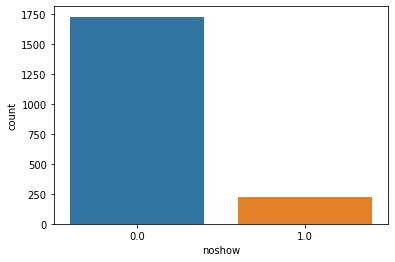

In [9]:
sns.countplot(x='noshow', data=noshow) #Distribution of the dependent variable

The data is imbalanced, there are more 0s than 1s in the dependent variable.

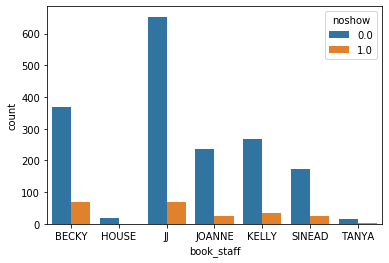

In [10]:
sns.countplot(x='book_staff', hue = "noshow", data=noshow)

According to the graph, Becky gets proportionally more no-shows than others.

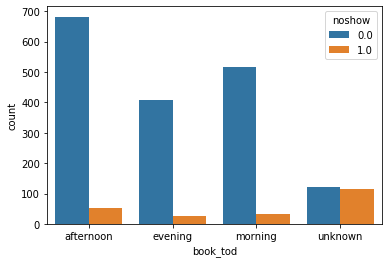

In [11]:
sns.countplot(x = "book_tod", hue = "noshow", data = noshow)

According to the graph, unknown book time of the day gets proportionally more no-shows than others.

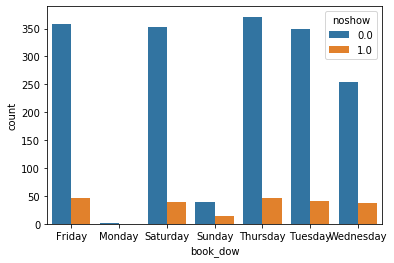

In [13]:
sns.countplot(x = "book_dow", hue = "noshow", data = noshow)

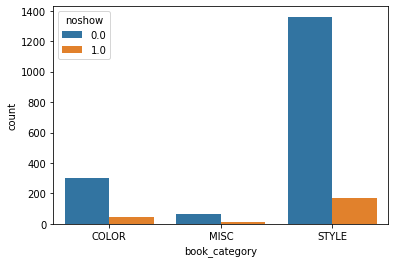

In [14]:
sns.countplot(x = "book_category", hue = "noshow", data = noshow)

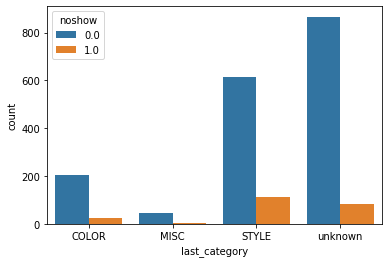

In [125]:
sns.countplot(x='last_category', hue = "noshow", data=noshow)

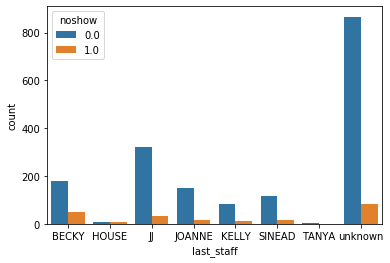

In [126]:
sns.countplot(x='last_staff', hue = "noshow", data=noshow)

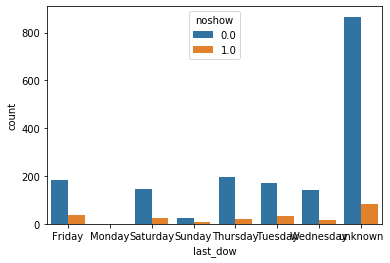

In [127]:
sns.countplot(x='last_dow', hue = "noshow", data=noshow)

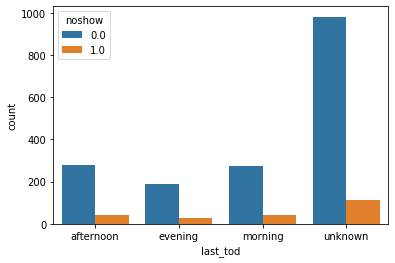

In [128]:
sns.countplot(x='last_tod', hue = "noshow", data=noshow)

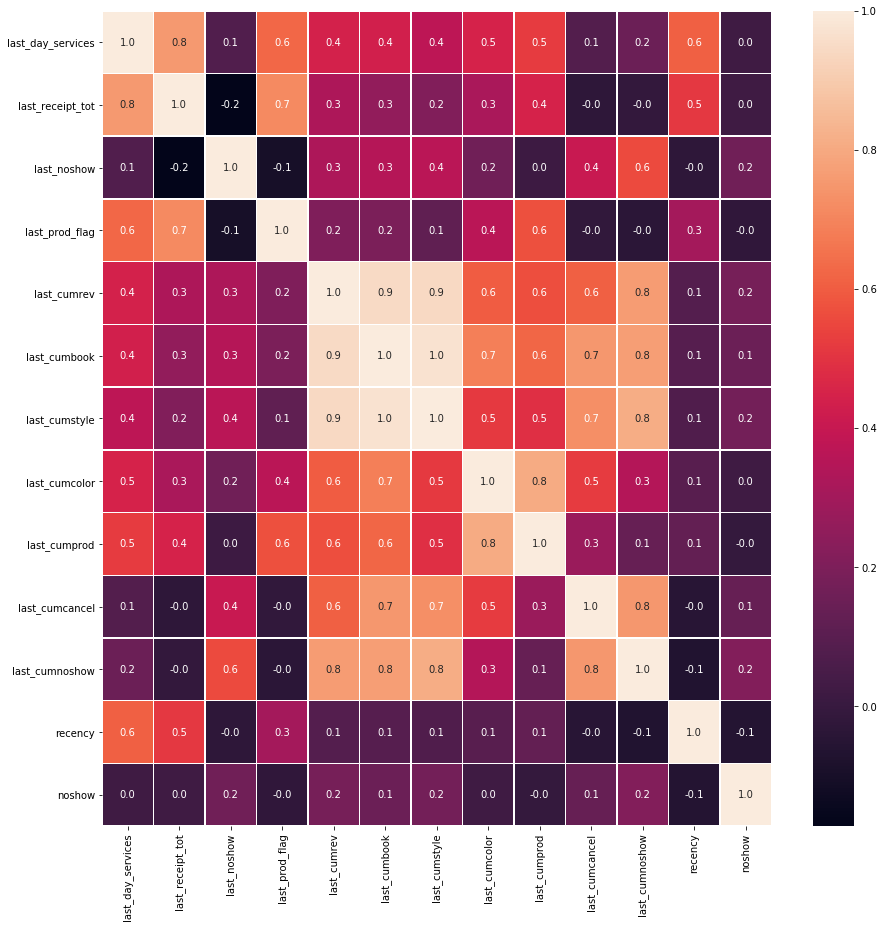

In [129]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(noshow.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

In [12]:
df_num = noshow.select_dtypes(include = ['float64'])
df_num.head()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
0                0.0               0.0          0.0             0.0   
1                0.0               0.0          0.0             0.0   
2                2.0             262.0          0.0             1.0   
3                0.0               0.0          0.0             0.0   
4                1.0              35.0          0.0             0.0   

   last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
0          0.0           0.0            0.0            0.0           0.0   
1          0.0           0.0            0.0            0.0           0.0   
2        262.0           2.0            1.0            1.0           2.0   
3          0.0           0.0            0.0            0.0           0.0   
4         35.0           1.0            1.0            0.0           0.0   

   last_cumcancel  last_cumnoshow  recency  noshow  
0             0.0             0.0      0.0     0.0  
1             0.0             0.0      0.0     0.0  
2             0.0             0.0     35.0     0.0  
3             0.0             0.0      0.0     0.0  
4             0.0             0.0      9.0     0.0

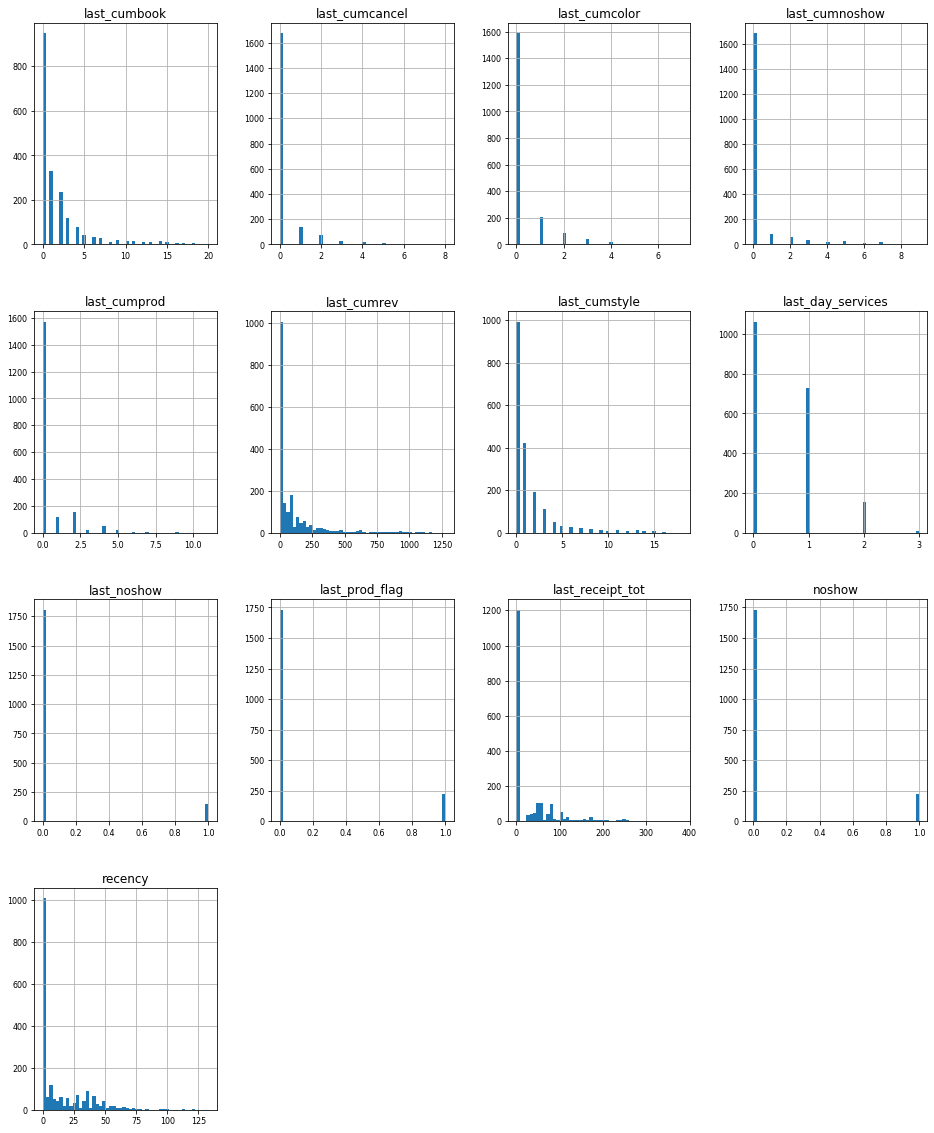

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

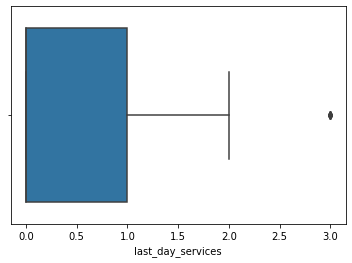

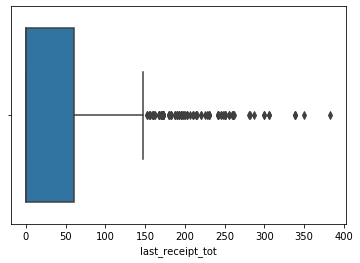

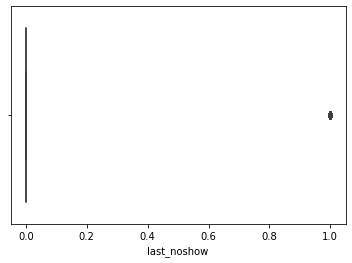

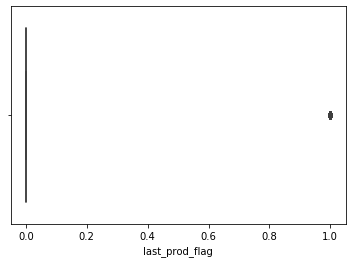

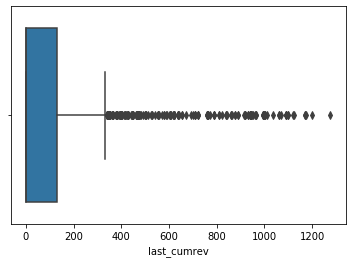

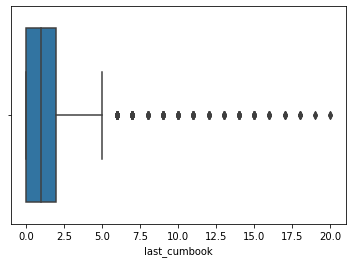

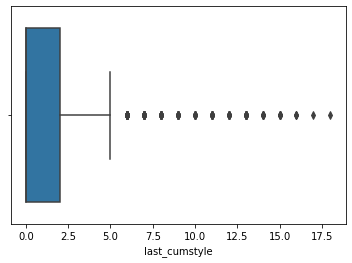

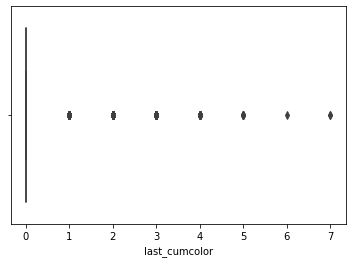

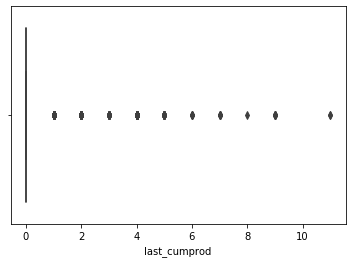

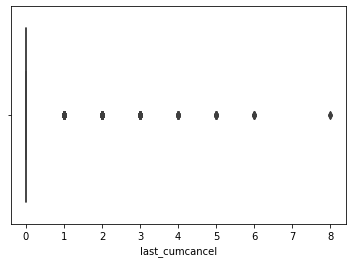

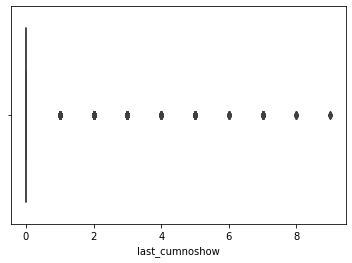

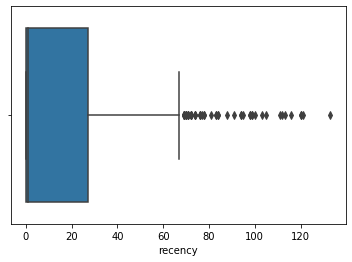

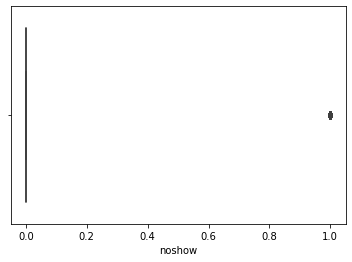

In [14]:

for var in numericVariableList:
    sns.boxplot(df_num[var])
    plt.show()

In [16]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [ ]:
# outlier_mask is a boolean list identifies the indices of the outliers


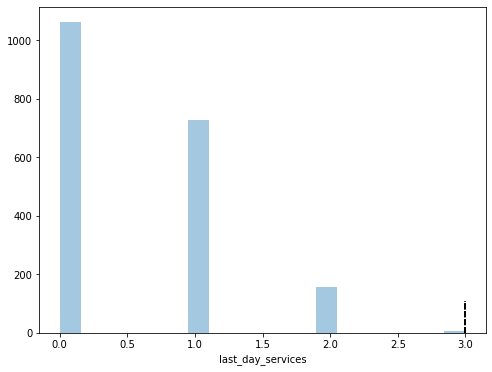

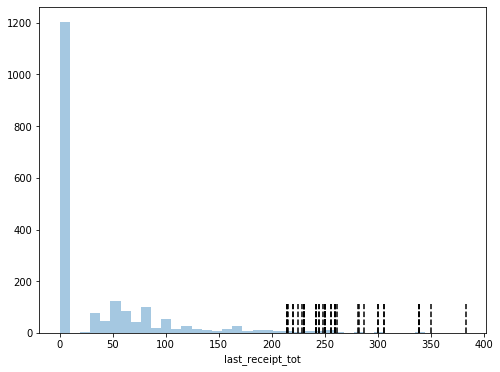

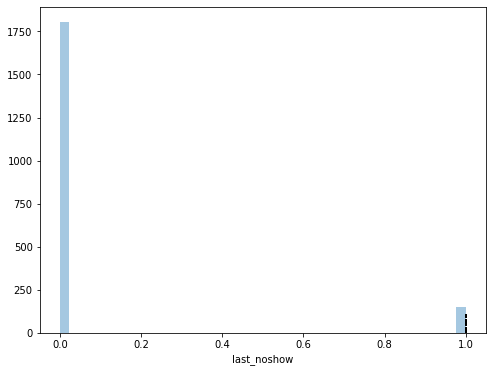

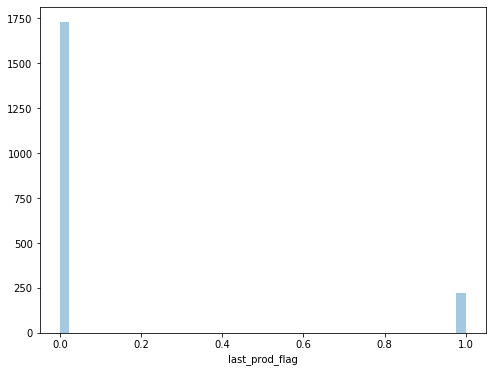

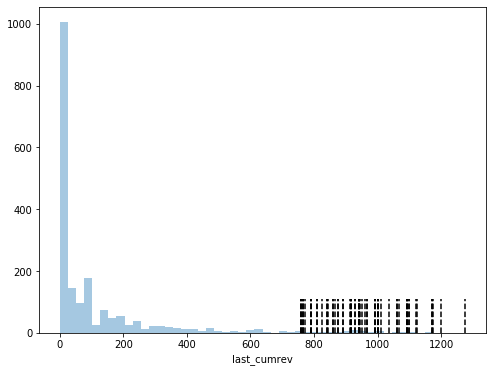

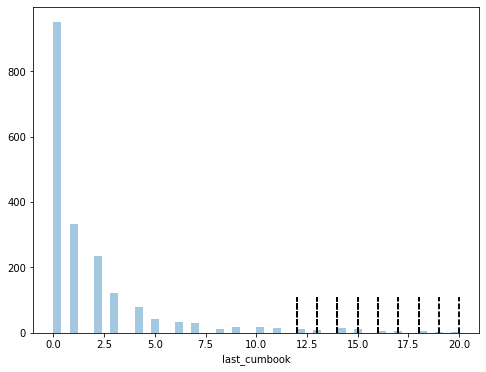

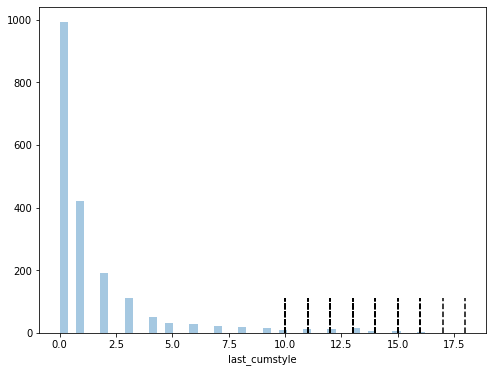

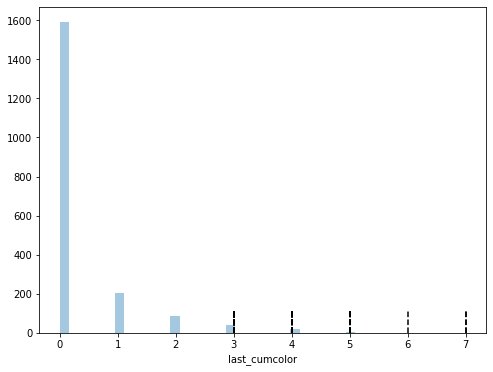

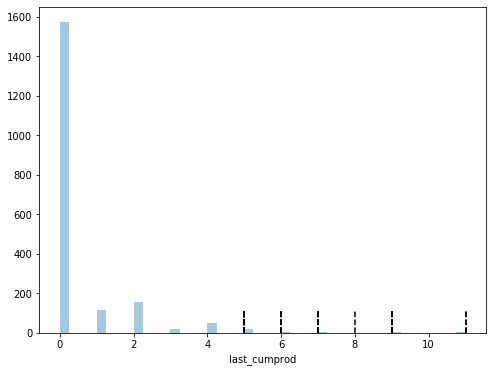

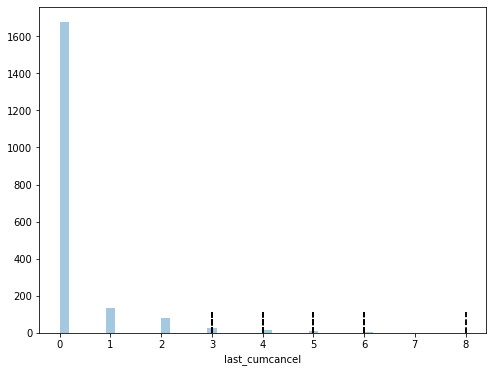

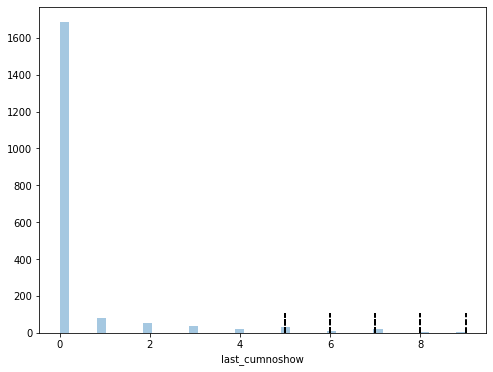

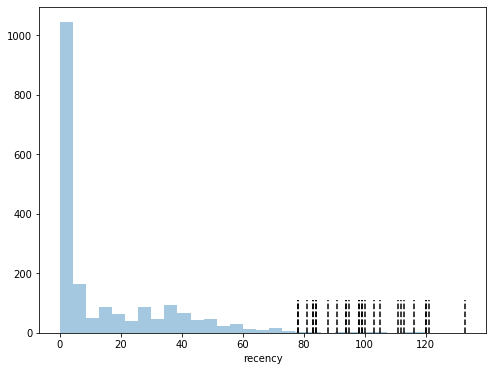

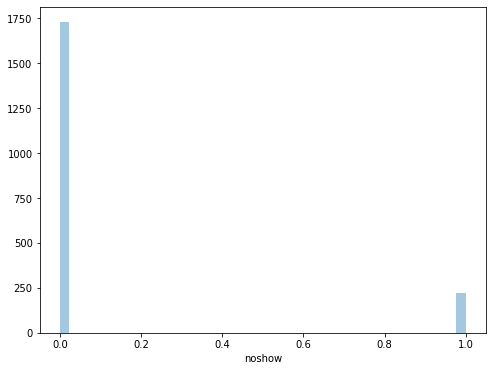

In [19]:
for var in numericVariableList:
    outlier_mask = out_std(df_num[var], nstd=3.0)
    plt.figure(figsize=(8,6))
    sns.distplot(df_num[var], kde=False);
    plt.vlines(df_num[var][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

In [20]:
#convert categorical to dummies
noshowf = pd.get_dummies(noshow, columns=["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"])

In [21]:
noshowf.head()

last_day_services  last_receipt_tot last_noshow last_prod_flag  last_cumrev  \
0               0.0               0.0         0.0            0.0          0.0   
1               0.0               0.0         0.0            0.0          0.0   
2               2.0             262.0         0.0            1.0        262.0   
3               0.0               0.0         0.0            0.0          0.0   
4               1.0              35.0         0.0            0.0         35.0   

   last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  last_cumcancel  \
0           0.0            0.0            0.0           0.0             0.0   
1           0.0            0.0            0.0           0.0             0.0   
2           2.0            1.0            1.0           2.0             0.0   
3           0.0            0.0            0.0           0.0             0.0   
4           1.0            1.0            0.0           0.0             0.0   

   ...  last_dow_Saturday  last_dow_Sunday last_dow_Thursday  \
0  ...                  0                0                 0   
1  ...                  0                0                 0   
2  ...                  0                0                 0   
3  ...                  0                0                 0   
4  ...                  0                0                 1   

   last_dow_Tuesday  last_dow_Wednesday  last_dow_unknown  last_tod_afternoon  \
0                 0                   0                 1                   0   
1                 0                   0                 1                   0   
2                 0                   1                 0                   0   
3                 0                   0                 1                   0   
4                 0                   0                 0                   1   

   last_tod_evening  last_tod_morning  last_tod_unknown  
0                 0                 0                 1  
1                 0                 0                 1  
2                 0                 1                 0  
3                 0                 0                 1  
4                 0                 0                 0  

[5 rows x 58 columns]

In [23]:
sns.countplot(x='noshow', data=noshowf) #Distribution of the dependent variable

In [39]:
noshowf.groupby('noshow').count()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
noshow                                                                     
0.0                  1728              1728         1728            1728   
1.0                   224               224          224             224   

        last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
noshow                                                                          
0.0            1728          1728           1728           1728          1728   
1.0             224           224            224            224           224   

        last_cumcancel  ...  last_dow_Saturday  last_dow_Sunday  \
noshow                  ...                                       
0.0               1728  ...               1728             1728   
1.0                224  ...                224              224   

        last_dow_Thursday  last_dow_Tuesday  last_dow_Wednesday  \
noshow                                                            
0.0                  1728              1728                1728   
1.0                   224               224                 224   

        last_dow_unknown  last_tod_afternoon  last_tod_evening  \
noshow                                                           
0.0                 1728                1728              1728   
1.0                  224                 224               224   

        last_tod_morning  last_tod_unknown  
noshow                                      
0.0                 1728              1728  
1.0                  224               224  

[2 rows x 57 columns]

In [43]:
noshowf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 58 columns):
last_day_services        1952 non-null category
last_receipt_tot         1952 non-null float64
last_noshow              1952 non-null category
last_prod_flag           1952 non-null category
last_cumrev              1952 non-null float64
last_cumbook             1952 non-null float64
last_cumstyle            1952 non-null float64
last_cumcolor            1952 non-null float64
last_cumprod             1952 non-null float64
last_cumcancel           1952 non-null float64
last_cumnoshow           1952 non-null float64
recency                  1952 non-null float64
noshow                   1952 non-null category
book_tod_afternoon       1952 non-null int32
book_tod_evening         1952 non-null int32
book_tod_morning         1952 non-null int32
book_tod_unknown         1952 non-null int32
book_dow_Friday          1952 non-null int32
book_dow_Monday          1952 non-null int32
book_dow

In [41]:
noshowf.describe()

last_receipt_tot  last_cumrev  last_cumbook  last_cumstyle  \
count       1952.000000  1952.000000   1952.000000    1952.000000   
mean          35.782679   111.258197      1.906762       1.520492   
std           59.371877   207.927702      3.315854       2.756585   
min            0.000000     0.000000      0.000000       0.000000   
25%            0.000000     0.000000      0.000000       0.000000   
50%            0.000000     0.000000      1.000000       0.000000   
75%           60.000000   132.000000      2.000000       2.000000   
max          382.800000  1276.000000     20.000000      18.000000   

       last_cumcolor  last_cumprod  last_cumcancel  last_cumnoshow  \
count    1952.000000   1952.000000     1952.000000     1952.000000   
mean        0.325307      0.487193        0.280225        0.422643   
std         0.827646      1.261275        0.853646        1.319786   
min         0.000000      0.000000        0.000000        0.000000   
25%         0.000000      0.000000        0.000000        0.000000   
50%         0.000000      0.000000        0.000000        0.000000   
75%         0.000000      0.000000        0.000000        0.000000   
max         7.000000     11.000000        8.000000        9.000000   

           recency  book_tod_afternoon  ...  last_dow_Saturday  \
count  1952.000000         1952.000000  ...        1952.000000   
mean     14.402152            0.376537  ...           0.088627   
std      21.079495            0.484641  ...           0.284277   
min       0.000000            0.000000  ...           0.000000   
25%       0.000000            0.000000  ...           0.000000   
50%       1.000000            0.000000  ...           0.000000   
75%      27.000000            1.000000  ...           0.000000   
max     133.000000            1.000000  ...           1.000000   

       last_dow_Sunday  last_dow_Thursday  last_dow_Tuesday  \
count      1952.000000        1952.000000       1952.000000   
mean          0.015881           0.112705          0.102459   
std           0.125048           0.316313          0.303329   
min           0.000000           0.000000          0.000000   
25%           0.000000           0.000000          0.000000   
50%           0.000000           0.000000          0.000000   
75%           0.000000           0.000000          0.000000   
max           1.000000           1.000000          1.000000   

       last_dow_Wednesday  last_dow_unknown  last_tod_afternoon  \
count         1952.000000       1952.000000         1952.000000   
mean             0.081967          0.486168            0.164447   
std              0.274385          0.499937            0.370775   
min              0.000000          0.000000            0.000000   
25%              0.000000          0.000000            0.000000   
50%              0.000000          0.000000            0.000000   
75%              0.000000          1.000000            0.000000   
max              1.000000          1.000000            1.000000   

       last_tod_evening  last_tod_morning  last_tod_unknown  
count       1952.000000       1952.000000       1952.000000  
mean           0.112705          0.162398          0.560451  
std            0.316313          0.368910          0.496459  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000  
50%            0.000000          0.000000          1.000000  
75%            0.000000          0.000000          1.000000  
max            1.000000          1.000000          1.000000  

[8 rows x 54 columns]

In [42]:
noshowf.iloc[:,13:] =noshowf.iloc[:,13:].astype("int")

In [44]:
noshowf.drop(columns=['noshow']).assign(noshow=noshowf['noshow'])

last_day_services  last_receipt_tot last_noshow last_prod_flag  \
0                  0.0               0.0         0.0            0.0   
1                  0.0               0.0         0.0            0.0   
2                  2.0             262.0         0.0            1.0   
3                  0.0               0.0         0.0            0.0   
4                  1.0              35.0         0.0            0.0   
...                ...               ...         ...            ...   
1947               0.0               0.0         0.0            0.0   
1948               1.0              30.0         0.0            0.0   
1949               1.0              30.0         0.0            0.0   
1950               1.0              50.0         0.0            0.0   
1951               1.0              50.0         0.0            0.0   

      last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
0             0.0           0.0            0.0            0.0           0.0   
1             0.0           0.0            0.0            0.0           0.0   
2           262.0           2.0            1.0            1.0           2.0   
3             0.0           0.0            0.0            0.0           0.0   
4            35.0           1.0            1.0            0.0           0.0   
...           ...           ...            ...            ...           ...   
1947          0.0           0.0            0.0            0.0           0.0   
1948         30.0           1.0            1.0            0.0           0.0   
1949         30.0           1.0            1.0            0.0           0.0   
1950        130.0           3.0            3.0            0.0           0.0   
1951        130.0           3.0            3.0            0.0           0.0   

      last_cumcancel  ...  last_dow_Sunday  last_dow_Thursday  \
0                0.0  ...                0                  0   
1                0.0  ...                0                  0   
2                0.0  ...                0                  0   
3                0.0  ...                0                  0   
4                0.0  ...                0                  1   
...              ...  ...              ...                ...   
1947             0.0  ...                0                  0   
1948             0.0  ...                0                  1   
1949             0.0  ...                0                  1   
1950             1.0  ...                0                  0   
1951             1.0  ...                0                  0   

      last_dow_Tuesday  last_dow_Wednesday  last_dow_unknown  \
0                    0                   0                 1   
1                    0                   0                 1   
2                    0                   1                 0   
3                    0                   0                 1   
4                    0                   0                 0   
...                ...                 ...               ...   
1947                 0                   0                 1   
1948                 0                   0                 0   
1949                 0                   0                 0   
1950                 1                   0                 0   
1951                 1                   0                 0   

      last_tod_afternoon  last_tod_evening  last_tod_morning  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 1   
3                      0                 0                 0   
4                      1                 0                 0   
...                  ...               ...               ...   
1947                   0                 0                 0   
1948                   1                 0                 0   
1949                   1                 0                 0   
1950         

In [30]:
#exploreData(data=noshow,y='noshow',categorize=True)

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


KeyError: "None of [Index(['book_tod'], dtype='object')] are in the [columns]"